In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

Here is the energy diagram for the last run! 

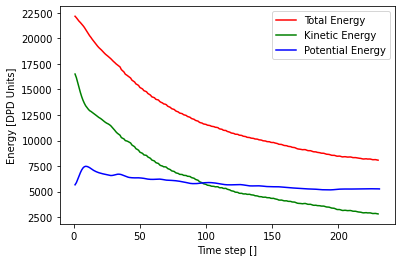

In [205]:
Energy = pd.read_csv("Energy.csv",names=["Step","Time","Epot","Ekin","Etot"])

plt.plot(Energy["Step"],Energy["Etot"],"red")
plt.plot(Energy["Step"],Energy["Ekin"],"green")
plt.plot(Energy["Step"],Energy["Epot"],"blue")
plt.legend(["Total Energy","Kinetic Energy","Potential Energy"])
plt.ylabel("Energy [DPD Units]")
plt.xlabel("Time step []")
plt.savefig("EnergyFig.svg")

Here is the seperation of type a and b particles along the x-axis. 

In [206]:

#Take these numbers from the c code.
numdt = 10000
resolutionDensity = 4

#reading data
rhoa = pd.read_csv("Densityax.csv",header=None)
rhob = pd.read_csv("Densitybx.csv",header=None)

l = rhoa.shape[1]

#correcting data

boxSize = 4 * 4 * 1 / resolutionDensity
expextedParts = boxSize * numdt

rhoa = rhoa / expextedParts
rhob = rhob / expextedParts

x = np.linspace(start=0,stop=l/resolutionDensity,num=l)
y = np.linspace(start=5,stop=5, num=l)

plt.figure(figsize=(12, 4))
plt.plot(x,rhoa.iloc[0],"red")
plt.plot(x,rhob.iloc[0],"green")
plt.plot(x,rhob.iloc[0]+ rhoa.iloc[0],"--b")
plt.plot(x,y,"k-",alpha=0.5)
plt.legend(["$\\rho_a$","$\\rho_b$","$\\rho_a + \\rho_b$"])
plt.xlim(0,20)
plt.ylim(0,5.5)
plt.xlabel("x-coordinate")
plt.ylabel("Density")
plt.savefig("Fig6.svg")



EmptyDataError: No columns to parse from file

2.6117547959444014


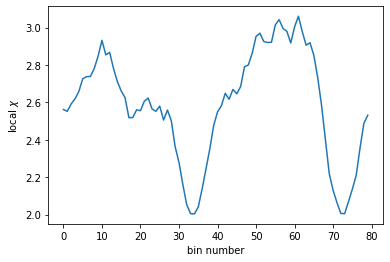

In [ ]:
xi = np.zeros(l-2)
for i in range(l-2):
    phia = rhoa.iloc[0][i] / (rhoa.iloc[0][i] + rhob.iloc[0][i])
    xi[i] = np.log((1-phia)/phia)/(1-(2*phia))

plt.plot(xi)
plt.ylabel("local $\\chi$")
plt.xlabel("bin number")
plt.savefig("wacky.svg")
myxi = np.median(xi)
print(myxi)

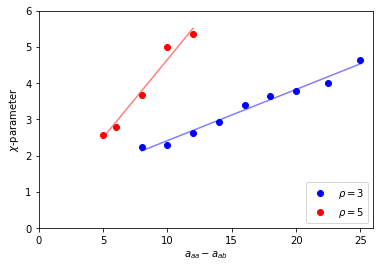

In [ ]:
da = [8,10,12,14,16,18,20,22.5,25]
xis = [2.2409488526945722,
    2.2985353785243725,
    2.6117547959444014,
    2.9219085143692034,
    3.4028300745926296,
    3.65559614323002,
    3.7760737099029984,
    3.998323968427937,
    4.635567559461311]

da5 = [5,6,8,10,12]
xis5 = [2.567787764437977,
        2.786926305398075,
        3.6724552128605623,
        4.980897429853789,
        5.339573454289354]

# Fit a linear regression line for each set of data
coefficients1 = np.polyfit(da, xis, 1)
line1 = np.polyval(coefficients1, da)

coefficients2 = np.polyfit(da5, xis5, 1)
line2 = np.polyval(coefficients2, da5)

plt.plot(da,xis,"bo")
plt.plot(da5,xis5,"ro")
plt.plot(da, line1, "b-", alpha=0.5)
plt.plot(da5, line2, "r-", alpha=0.5)
plt.legend(["$\\rho = 3$","$\\rho = 5$"],loc=4)
plt.xlabel("$a_{aa} - a_{ab}$")
plt.ylabel("$\\chi$-parameter")

plt.ylim(0,6)
plt.xlim(0,26)
plt.savefig("Fig7.svg")